# X-Risk Exploratory Data Analysis

In this notebook we go through the existential risk database to learn about the estimates made by different people on the subject.

The main goal of this EDA is to learn about the estimates provided by different people throughout the years, and see if we can condense them into concise values that we can use later on for modeling humanity's survival. This would provide us with important data for a baseline scenario.

**Note from a human 🤓**: For this work, I used Claude AI to help me formulate some text sections and to help me process some data. I wrote most of it, and whatever I used from Claude I have thoroughly read. There are some sections entirely written by Claude AI though, which I've marked with 🤖. In those sections you'll find a "Note from a human 🤓" with an explanation.

In [102]:
# Imports and basic setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set_theme(style='darkgrid')

The data has already been pre-processed in the notebook [x-risk-database-processing.ipynb]('./x-risk-database-rocessing.ipynb'). In the file `data/processed_estimates/all_estimates.csv`, the data form the original existential risk database (from [this EA Forum Post](https://forum.effectivealtruism.org/s/MGRxKfQsZXiw9JHwD/p/JQQAQrunyGGhzE23a)) have been processed.

One of the main things done during the pre-processing was using Claude AI to provide per-century risk estimates for each estimate in the database, based on the database inputs themselves. This allowed homogenizing the estimates, since many of them were given in natural language and provided ranges, or estimates with varying timeframes.

In the file we're working with in this notebook, all estimates have a per-century risk value.

I should note that this process of getting a single value from the estimates in the database clearly removes some nuance provided in the original estimates, and some information gets lost in the process.

In [103]:
# Load the data
df = pd.read_csv('./data/processed_estimates/all_estimates.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   estimator                      83 non-null     object 
 1   original_estimate              83 non-null     object 
 2   per_century_risk               83 non-null     float64
 3   estimate_confidence            83 non-null     object 
 4   conversion_confidence          83 non-null     object 
 5   reasoning                      83 non-null     object 
 6   risk_category                  83 non-null     object 
 7   estimate_confidence_numeric    83 non-null     int64  
 8   conversion_confidence_numeric  83 non-null     int64  
 9   date                           83 non-null     int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 6.6+ KB


# Overview

Before diving into the whole data exploration, I think this is a good place to talk about the concept of X-Risk, and give a brief summary of each of the categories.

## X-Risk

The concept of existential risk, or X-Risk is especially relevant for this whole discussion.

An existential risk is a threat that could either cause human extinction or permanently and drastically limit humanity's potential. This definition is crucial because it focuses on humanity's **long-term potential**.

Key aspects that make something an X-Risk are:
1. The scale of impact; it must threaten:
   - Human extinction
   - Permanent civilization collapse without recovery
   - Drastic reduction in humanity's future potential
2. Permanence: The impact must be effectively irreversible or create a permanent lock-in of negative outcomes.

The language here is vague, but this only reflects our uncertainty as to what can happen. While the field of longtermism tries to study potential threats to humanity's potential, it is impossible to foresee all the ways that a "negative outcome" can occur. And while we can picture some negative outcomes, like extinction, or the establishment of a lock-in authoritarian state that lasts for millennia, we can't imagine all the possible scenarios. 

These criteria explain the seemingly low climate change estimates (which we'll see once we get to the data) - while climate change is a severe threat, most scenarios don't completely prevent humanity's eventual recovery or eliminate our long-term potential. For example, even severe warming might kill billions and collapse civilization, but surviving humans could potentially rebuild over centuries or millennia.

This perspective from longtermism explains why even small probabilities of true x-risks are taken seriously - they threaten not just current lives but potentially billions of years of future human flourishing. This is what Toby Ord calls "the precipice" - our current era where we have technology capable of causing extinction but haven't yet secured humanity's long-term survival.

The exploration of X-Risks highlights that what matters isn't just survival, but maintaining humanity's potential to create a positive future worth living in, which is why some scenarios (like permanent dystopias) can be x-risks even without causing extinction.

In [104]:
# Get the unique risk categories
xrisk_categories = [category.capitalize().replace('_', ' ') for category in set(df['risk_category'])]
print(f'There are {len(xrisk_categories)} unique risk categories:\n-\t{"\n-\t".join(xrisk_categories)}')

There are 10 unique risk categories:
-	War
-	Nuclear
-	Nanotechnology
-	Ai
-	Dystopia
-	Total
-	Natural risks
-	Biorisk
-	Miscellaneous
-	Climate change


## X-Risk Categories

Here a brief summary of each of the X-Risk categories. We won't get here into detailed failure mechanisms that explain how each of these might become an existential risk.

Based on the provided CSV files, here are the main existential risk categories tracked in the database:

Here's how each category qualifies as an existential risk:

### AI 
- Could lead to loss of human agency and control
- Potential for superintelligent systems to optimize for goals misaligned with human values
- Could cause rapid, irreversible changes to civilization's trajectory

### Biorisk
- Engineered pandemics could be designed to maximize lethality and transmissibility
- Could cause civilization collapse if severe enough to disrupt critical infrastructure
- Natural pandemics pose lower x-risk due to evolved constraints on pathogen behavior

### Nuclear & War
- Could trigger nuclear winter affecting global agriculture
- Great power conflicts might escalate to civilization-ending exchanges
- Potential to destroy critical infrastructure needed for recovery

### Climate Change
- Qualifies mainly as a risk multiplier
- Could create resource conflicts leading to other x-risks
- Extreme scenarios might make Earth temporarily uninhabitable

### Natural Risks
- Supervolcanoes or asteroids could cause global cooling
- Stellar events could sterilize Earth's surface
- Generally allow more possibility for recovery than anthropogenic risks

### Nanotechnology
- Self-replicating systems could consume essential resources
- Molecular manufacturing accidents might spiral out of control
- Could be weaponized for maximum destruction

### Dystopia
- Permanent lock-in of negative outcomes
- Could prevent humanity from reaching its potential
- Might be irreversible due to technological surveillance/control

### Miscellaneous
- Includes unforeseen technological risks
- Ecological collapse scenarios
- Global system collapse that prevents recovery

### Total Risk
- Aggregate assessment of humanity's chances of surviving the next century
- Considers interactions between different risk categories
- Reflects overall probability of losing humanity's long-term potential

# Initial Observations

With only 81 estimates spread across approximately 9-10 risk categories, we're working with an average of just 8-9 estimates per category. This limited data presents important statistical challenges and implications.

The small sample size affects the reliability and robustness of our statistical analyses in multiple ways. 

First, with such limited data points per category, individual estimates carry disproportionate weight and outliers can significantly skew results. 

Second, traditional statistical tests and correlation analyses become less reliable with small sample sizes, as they typically require larger datasets to detect meaningful patterns with confidence.

It might be an interesting idea, for a future project, to create a platform where experts and non-experts can provide their own x-risk estimates to leverage the "wisdom of the crowds".

In [105]:
# Provide aliases to the categories for better readability on plots.
categories_aliases = {
    "ai": "AI",
    "natural_risks": "Natural\nRisks",
    "nanotechnology": "Nanotech",
    "climate_change": "Climate\nChange",
    "war": "War",
    "miscellaneous": "Misc",
    "biorisk": "Biorisk",
    "total": "Total\nRisk",
    "dystopia": "Dystopia",
    "nuclear": "Nuclear",
}
df['category_alias'] = df['risk_category'].map(categories_aliases)


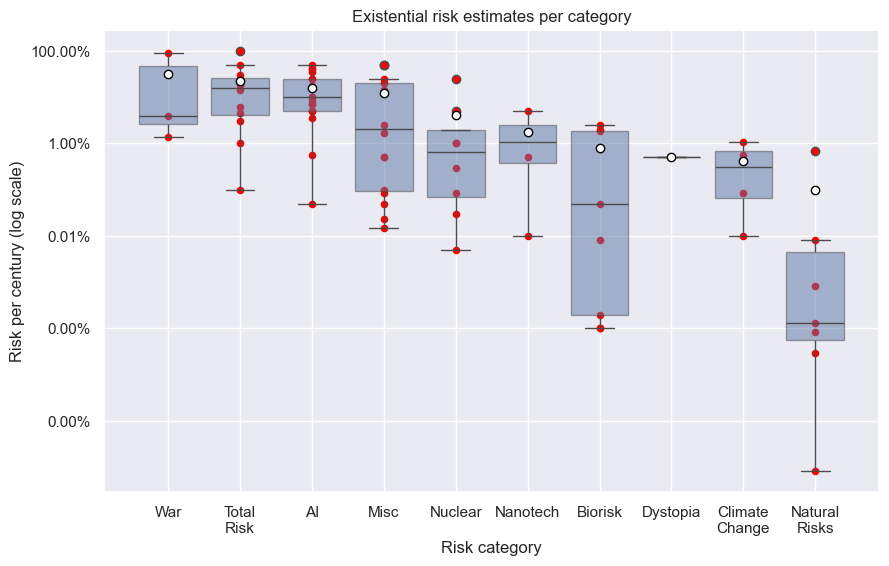

In [106]:
# Plot the risk categories as scatter plot.
ordered_categories_by_mean_risk = df.groupby('category_alias')['per_century_risk'].mean().sort_values(ascending=False).index

ax = sns.boxplot(x='category_alias', y='per_century_risk', data=df, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}, boxprops=dict(alpha=0.5), order=ordered_categories_by_mean_risk)

df.plot(kind='scatter', x='category_alias', y='per_century_risk', color='red', figsize=(10, 6), ax=ax)

ax.set_title('Existential risk estimates per category')
ax.set_ylabel('Risk per century (log scale)')
ax.set_xlabel('Risk category')
ax.set_yscale('log')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))

In [107]:
# Compute mean, median and standard deviation for each risk category
df.groupby('risk_category')['per_century_risk'].agg(['mean', 'median', 'std']).sort_values(by='median', ascending=False)

,mean,median,std
risk_category,,,
total,0.225332,0.161500,0.283787
ai,0.161579,0.100000,0.154940
war,0.318000,0.040000,0.504194
miscellaneous,0.124088,0.020850,0.170602
nanotechnology,0.017950,0.010850,0.022473
nuclear,0.040523,0.006500,0.086250
dystopia,0.005000,0.005000,NaN
climate_change,0.004233,0.003165,0.004815
biorisk,0.008032,0.000500,0.010398


### Observations

- War shows the highest mean risk (~30%), but a significantly lower median (almost factor 10) of 4% with extremely a high standard deviation.
- Total risk and AI follow as second and third-highest risks (~20% and ~15% median), with smaller standard deviation as War.
- Natural risks show the lowest estimates (<1%) with the smallest standard deviation
- Nuclear, nanotech, and biorisk cluster in the low-but-significant range (1-5%)
- Most categories show significant spread in estimates, indicating expert disagreement
- Climate change estimates are notably low.

Let's visualize now the number of estimates per category. This might give us an insight into the fields or existential risks, that have been either explored the most or that have gained the most interest.

Text(0, 0.5, 'Count')

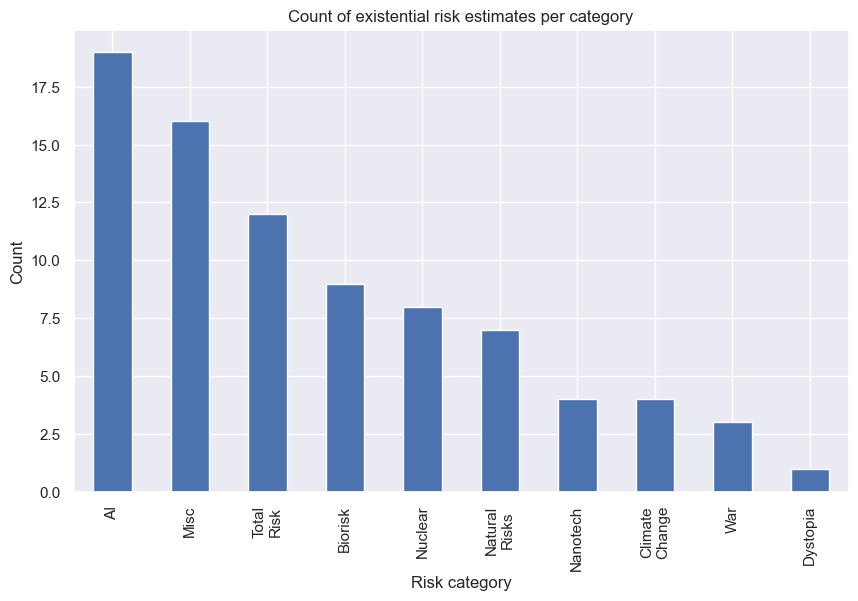

In [108]:
# Plot the count of estimates per category
ax = df['category_alias'].value_counts().plot(kind='bar', title='Count of existential risk estimates per category')
ax.set_xlabel('Risk category')
ax.set_ylabel('Count')

In [109]:
# Print the count of estimates per category
df['category_alias'].value_counts()

category_alias
AI                 19
Misc               16
Total\nRisk        12
Biorisk             9
Nuclear             8
Natural\nRisks      7
Nanotech            4
Climate\nChange     4
War                 3
Dystopia            1
Name: count, dtype: int64

In [110]:
# Print the mean, median and std of the count of risk estimates per category
df['category_alias'].value_counts().agg(['mean', 'median', 'std'])

mean      8.300000
median    7.500000
std       5.850926
Name: count, dtype: float64

It is notable that AI has the most number of estimates. Also, the category Miscellaneous has a considerable number of estimates, even more than estimates for total risk.

We see that there's high standard deviation in the number of estimates per category, with a median of 7.5, and a mean of 8.1. However, AI has the maximum number of estimates at 19, while Dystopia has only 1.

This might suggest that AI is a field that's gained a lot of attention. Later, in section [Time-Based Analysis](#time-based-analysis), we'll see if this is a trend that follows a temporal pattern.


# Outliers

There are a few outliers in the data which we'll look at more in detail, to see if they were perhaps conversion errors by Claude or something else.



## Nuclear

There's a value of 25% for nuclear risk which seems suspect, given that all other values are so low.


In [111]:
# Get outlier from nuclear category and risk above 20%
nuclear_outlier = df[(df['risk_category'] == 'nuclear') & (df['per_century_risk'] > 0.2)]
nuclear_outlier

,estimator,original_estimate,per_century_risk,estimate_confidence,conversion_confidence,reasoning,risk_category,estimate_confidence_numeric,conversion_confidence_numeric,date,category_alias
37,Dave Denkenberger,0.29% annual,0.25,medium,medium,Converted annual to century using compound pro...,nuclear,2,2,2018,Nuclear


In [112]:
# Print the reasoning for this value
print(f'Reasoning: {nuclear_outlier["reasoning"].values[0]}')

Reasoning: Converted annual to century using compound probability: 1-(1-0.0029)^100.


Okay, so Claude tried to convert the value from 0.29% annual to a per century risk using compound probability, which he did correctly.

Let's confirm this:

I introduce the following variables and probabilities:

$$
\begin{align}
E&: \text{Existential catastrophe occurs} \\
P_1(E)&: \text{Existential risk per year}=0.0029 \\
P_{100}(E)&: \text{Existential risk per century}=?
\end{align}
$$

If the annual risk estimate is 0.29%, then we ask, how likely is it that this risk doesn't happen for 100 years in a row?

We can express that as: $(1-P_1(E))^{100}$, and the complement probability is that the risk will occur at least once in 100 years, so we get

$$
\begin{align}
P(R_1) &= 0.0029 \\
P(R_{100}) &= 1-P'(R_1)^{100} \\
P(R_{100}) &= 1-(1-P(R_1))^{100} \\
P(R_{100}) &= 1-(1-0.0029)^{100} \\
P(R_{100}) &\approx 0.252 \text{ or } 25\%
\end{align}
$$

To convert a period of size $a$ to another period of size $b$ we can simply replace the 100 years in the example by the number of times that period $a$ fits into $b$:

$$
P(R_{a}) = 1-(1-P(R_{b}))^{\frac{b}{a}}
$$

Claude also converted another value from 0.051% annual to 5% per century. By using the formulas above we get:

$$
\begin{align}
P(R_1) &= 0.00051 \\
P(R_{100}) &= 1-P'(R_1)^{100} \\
P(R_{100}) &= 1-(1-P(R_1))^{100} \\
P(R_{100}) &= 1-(1-0.00051)^{100} \\
P(R_{100}) &\approx 0.0497 \text{ or } 0.49\%
\end{align}
$$

So the conversion seems also correct.

## War

By looking at the data, the corresponding outlier is from an estimate by William MacAskill. The remarks were summarized as: 

> '90% conditional on x-risk occurring'.

I had to take a look at the original database to understand exactly what he meant, and it still is not very clear. In the remarks it says:

> In terms of my estimates for existential risk over the century, I would put 90% of the risk coming from wartime or something precisely because people… If you tell me someone’s done something, a country’s done something incredibly stupid and kind of against their own interest or in some sense of global interest, it’s probably happened during a war period.

Given this interpretation, we cannot validly calculate a specific war risk percentage from these statements. The 90% figure isn't a clean conditional probability that we can use to get his estimate for war-related X-Risk. 

Instead, his statement describes war's role as a risk factor that interacts with and amplifies other existential risks. We'll remove the entry because it doesn't really reflect an x-risk estimate. However, we'll keep it in mind as an indication that there is at least one field expert who thinks that war is an important factor that clearly exacerbates other x-risks


In [113]:
# Remove war outlier
df = df[df['per_century_risk'] < 0.9]


### Total Risk
There's a value of 1, or 100% existential risk per century for Total Risk. Let's investigate.

In this case, I had to double check the original dataset, and it turns out that this estimator, Frank Tipler said, in 2019

> "Personally, I now think we humans will be wiped out this century". 

So a 100% risk is actually a correct conversion.

First, should we remove this outlier? We might be tempted to drop such an extreme value. However, in existential risk assessment, we're dealing with expert opinions rather than natural phenomena where outliers might represent measurement errors.

Second, let's think about the nature of expert opinions. Unlike physical measurements where extreme outliers often represent errors, an extreme opinion might represent a genuinely held belief based on careful consideration. Frank Tipler is a physicist and mathematician who has published extensively on cosmology and the future of humanity. His estimate, while extreme, comes from his reasoning. So, we'll leave it in.

I find it notable though that his estimate was entered as "N/A" in the original database.

## Misc

There's an outlier in the misc category.

In [114]:
df[(df['risk_category'] == 'miscellaneous') & (df['per_century_risk'] > 0.3)]

,estimator,original_estimate,per_century_risk,estimate_confidence,conversion_confidence,reasoning,risk_category,estimate_confidence_numeric,conversion_confidence_numeric,date,category_alias
61,Holden Karnofsky (human),≥50% PASTA impact this century,0.5,medium,high,Direct century estimate. Conditional on PASTA ...,miscellaneous,2,3,2021,Misc
63,Wei Dai,≥50% value loss from poor deliberation,0.5,medium,low,Unclear timeframe assumed to be century. Mediu...,miscellaneous,2,1,2021,Misc


It turns out that these estimates were directly given per century and are both at least 50%, so their values could be even higher. Claude gave them both a medium estimate confidence that reflects this uncertainty in the estimate, and high and low conversion confidence.

## Correlation Analysis

Now that we handled the outliers, we'll perform a correlation analysis to see if there are any significant correlations in the data.

In [115]:
# Describe the dataframe, which also reveals the numerical columns
df.describe()

,per_century_risk,estimate_confidence_numeric,conversion_confidence_numeric,date
count,8.100000e+01,81.00000,81.000000,81.000000
mean,9.025236e-02,2.00000,2.666667,2016.111111
std,1.377480e-01,0.65192,0.612372,5.909738
min,8.300000e-10,1.00000,1.000000,1993.000000
25%,8.300000e-04,2.00000,2.000000,2015.000000
50%,1.900000e-02,2.00000,3.000000,2018.000000
75%,1.390000e-01,2.00000,3.000000,2020.000000
max,5.000000e-01,3.00000,3.000000,2023.000000


We have 4 numeric columns. Let's begin by plotting the columns against each other to see if any patterns come up.

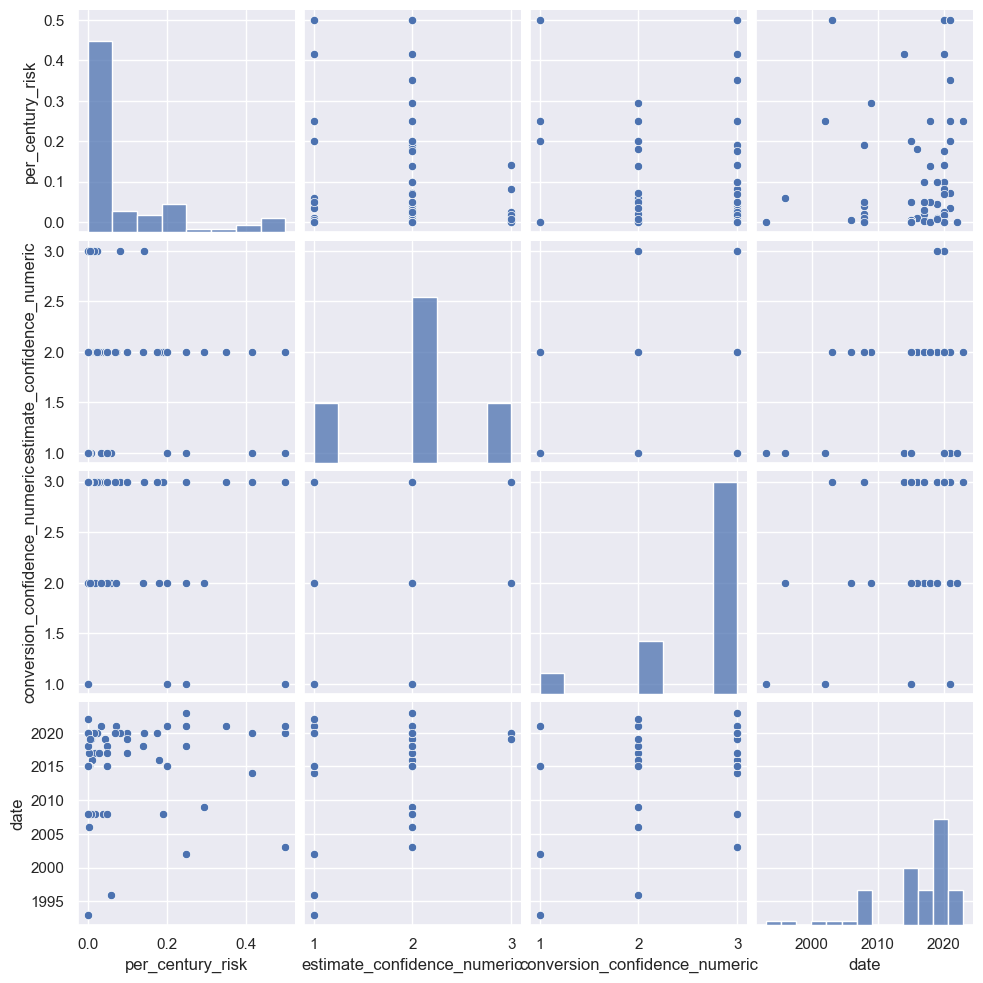

In [116]:
df_numeric = df[['per_century_risk', 'estimate_confidence_numeric', 'conversion_confidence_numeric', 'date']].copy()
sns.pairplot(df_numeric)

## Correlation Matrix

Let's now look at the correlation matrix, to see numerically how strongly the columns might be correlated.

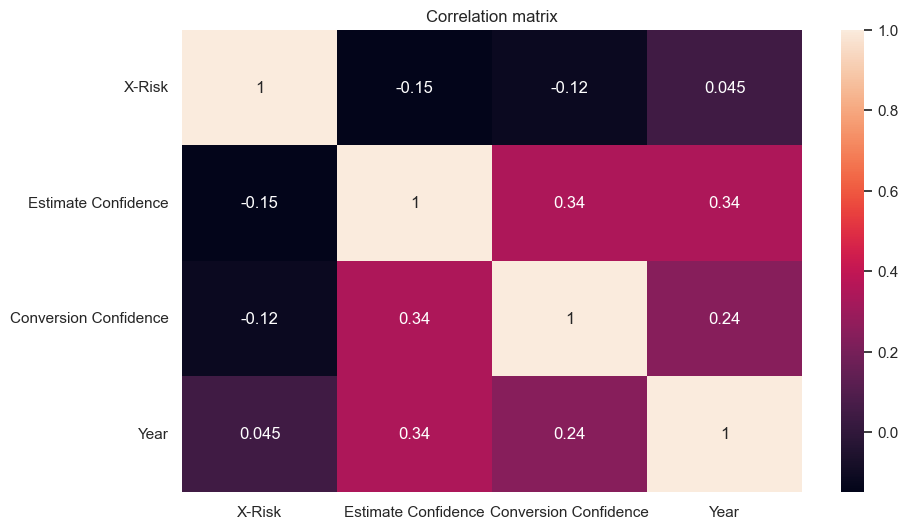

In [117]:
labels=['X-Risk', 'Estimate Confidence', 'Conversion Confidence', 'Year']
ax = sns.heatmap(df_numeric.corr(), annot=True, xticklabels=labels, yticklabels=labels)
ax.set_title('Correlation matrix')
plt.show()

### Observations

Looking at the correlation matrix and correlation plots, we can make the following observations:

1. Risk and Confidence Relationship:
- There's a slight negative correlation between X-Risk estimates and both confidence measures
- Estimate Confidence: -0.15
- Conversion Confidence: -0.12
- This suggests that higher risk estimates tend to come with slightly lower confidence levels, though the correlation is weak

2. Between Confidence Measures:
- There's a moderate positive correlation (0.34) between Estimate Confidence and Conversion Confidence
- This makes intuitive sense - estimates that are more confident in their base assessment tend to also be more confident in their conversion to century-scale risks. This might be because the language tends to be clearer and more concise.

3. Temporal Trends:
- Year shows positive correlations with both confidence measures:
  - Estimate Confidence: 0.34
  - Conversion Confidence: 0.24
- This suggests that more recent estimates tend to have higher confidence levels
- There's a very weak positive correlation (0.045) between Year and X-Risk estimates, suggesting risk assessments haven't systematically increased or decreased over time

4. Strength of Correlations:
- None of the correlations are particularly strong (all < 0.5)
- The strongest correlations involve the confidence measures
- The weakest correlation is between Year and X-Risk (0.045)

These patterns suggest that while our confidence in making these estimates has slightly increased over time, our assessment of the actual risks hasn't shown a strong directional trend. The negative correlation between risk estimates and confidence might indicate that experts become more cautious (less confident) when proposing higher risk estimates.

It is also important to note that the conversion and estimate confidence values were given by Claude AI! For a note on the reasoning behind the conversions and the estimates, check out the notebook [x-risk-database-processing]('./x-risk-database-processing.ipynb').

We also have to consider that we're dealing with a very small dataset. Maybe if we could increase the number of data points, we could reveal more robust insights.

## Risk Category Correlation

Let's now see if there are more significant correlations between categories, and when we look at them in isolation.

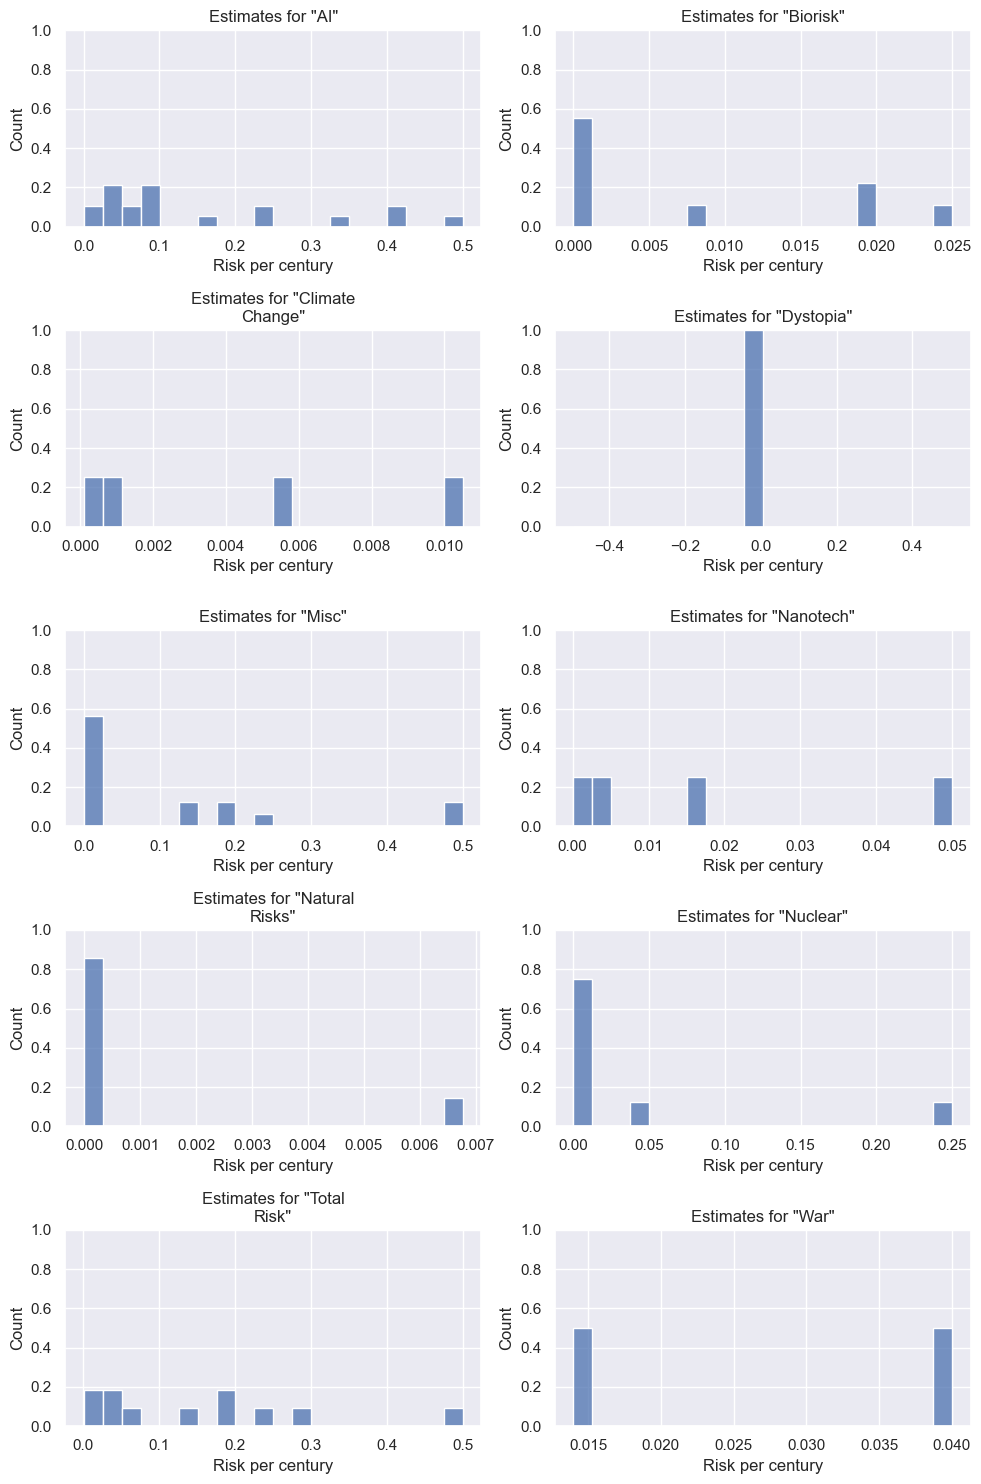

In [118]:
group_by_category = df.groupby('risk_category')

# Plot the distribution of risk estimates per category
fig, axes = plt.subplots(5, 2, figsize=(10, 15))

for i, (category, data) in enumerate(group_by_category):
  ax = axes[i // 2, i % 2]
  sns.histplot(data['per_century_risk'], bins=20, ax=ax, stat='probability')
  ax.set_title(f'Estimates for "{categories_aliases[category]}"')
  ax.set_xlabel('Risk per century')
  ax.set_ylabel('Count')
  ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

### Observations

Key observations from the risk estimate distributions:

1. Bimodal/Skewed Distributions:
- AI risk shows a bimodal distribution with peaks around 0.1 and 0.5 risk per century
- Most categories are right-skewed, with many low estimates and fewer high ones

2. Range and Magnitudes:
- Dystopia shows only one estimate at 0.0
- Natural risks cluster at very low probabilities (<0.001)
- AI and total risk estimates span the widest ranges (0-1.0)
- Climate change estimates are relatively concentrated (0.000-0.010)

3. Expert Agreement/Disagreement:
- Strong agreement on natural risks being very low
- High variance in AI risk estimates, suggesting expert uncertainty
- War risk estimates show polarization with estimates either very low or very high
- Nanotech risk estimates cluster around 0.01-0.02 with some outliers

4. Relative Magnitudes:
- AI, war, and total risk categories show the highest average estimates
- Natural risks, climate change show lowest average estimates
- Biorisk estimates fall in middle range (0.000-0.025)

5. Sample Sizes:
- AI risk has the most estimates
- Dystopia has very few estimates
- Most categories have 4-8 estimates

This suggests experts view artificial intelligence and war as leading existential risks, while natural disasters and climate change are considered lower risks.

# Time Based Analysis

Since we have data regarding when the observations were made, we could investigate if there is any correlation between the date when the estimate was made and the magnitude of the estimate. This would highlight a trend (if any), of whether experts are growing more or less concerned about existential risks as time passes.

Let's first view the magnitude of the analysis through time, as well as the count.

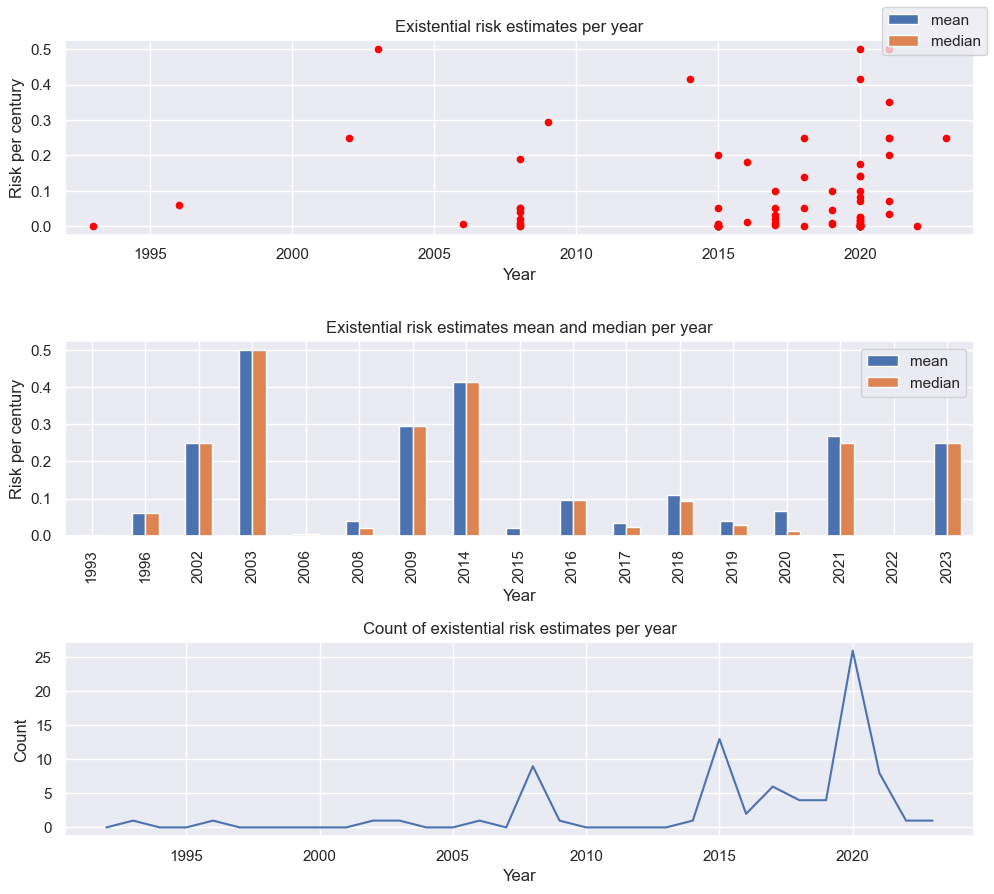

In [119]:
# Visualize the risk estimates through the years.
fig, axes = plt.subplots(3, figsize=(10, 9))
year_range = (df['date'].min()-1, df['date'].max()+1)

# Visualize risk estimates per year
ax = axes[0]
df.plot(kind='scatter', x='date', y='per_century_risk', color='red', ax=ax)
ax.set_title('Existential risk estimates per year')
ax.set_ylabel('Risk per century')
ax.set_xlabel('Year')
ax.set_xlim(year_range)

# Visualize mean and median per year
ax = axes[1]
df.groupby('date')['per_century_risk'].agg(['mean', 'median']).plot(ax=ax, kind='bar')
ax.set_title('Existential risk estimates mean and median per year')
ax.set_ylabel('Risk per century')
ax.set_xlabel('Year')
fig.legend()

# Visualize count of estimates per year
ax = axes[2]
value_count_per_year = np.zeros(year_range[1] - year_range[0])
for year in range(*year_range):
  value_count_per_year[year - year_range[0]] = df[df['date'] == year].shape[0]
ax.plot(range(*year_range), value_count_per_year)
ax.set_title('Count of existential risk estimates per year')
ax.set_ylabel('Count')
ax.set_xlabel('Year')
fig.tight_layout()

## Observations

The top scatter plot shows individual estimates becoming more frequent and more varied in recent years, with estimates ranging from near 0% to about 50% risk per century. 

The middle plot, showing mean and median trends, reveals notable volatility in expert estimates over time, with several significant spikes around 2005 and 2015 where estimates reached approximately 50% risk, though generally hovering between 10-30% in more recent years.

Perhaps most tellingly, the bottom plot demonstrates a significant increase in the number of existential risk estimates in 2015, with a particularly sharp peak in 2020. 

This surge in risk assessment activity suggests growing academic and professional interest in existential risks, possibly driven by rapid technological advancement and increasing awareness of global challenges. The higher frequency of estimates in recent years also provides a more robust dataset for analysis, though the wide spread of estimates indicates significant uncertainty and disagreement among experts about the magnitude of existential risks.

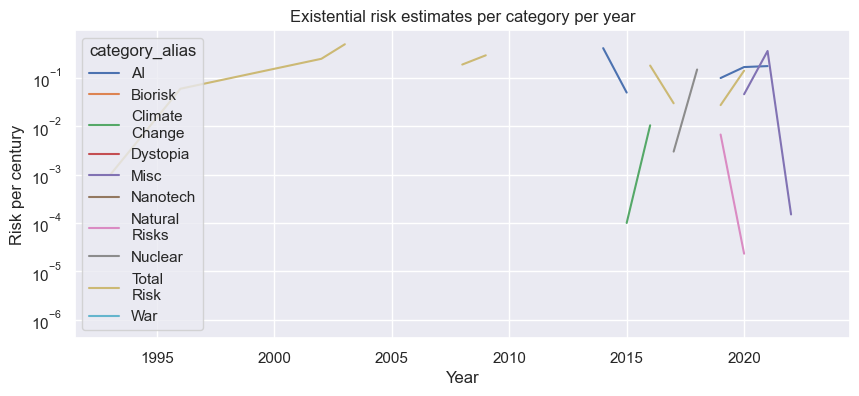

In [120]:
# Plot the risk estimates per category per year
fig, ax = plt.subplots(figsize=(10, 4))
df.groupby(['date', 'category_alias'])['per_century_risk'].mean().unstack().plot(ax=ax, kind='line')
ax.set_title('Existential risk estimates per category per year')
ax.set_ylabel('Risk per century')
ax.set_xlabel('Year')
ax.set_yscale('log')


## Observations - Estimates per Category per Year

By plotting the estimates we see that there is a lot of discontinuity. Most categories have data only in later years, with very little values to be certain about any emerging trends.

While looking at distinct trends is difficult given the sparsity of the data, it is notable that estimates for some risks tend to grow and shrink in parallel. Might there be any correlation between the risk categories? It might as well be, but we'll skip a thorough analysis for now. Because there is so little data, especially when the estimates overlap, it would be hard to identify solid trends. It has been said, for instance that climate change might exacerbate war-related risks, since ecological disaster might raise tensions in the competition for resources.

Just for completion's sake, we'll take a look at the correlation between risk estimates per categories per year.

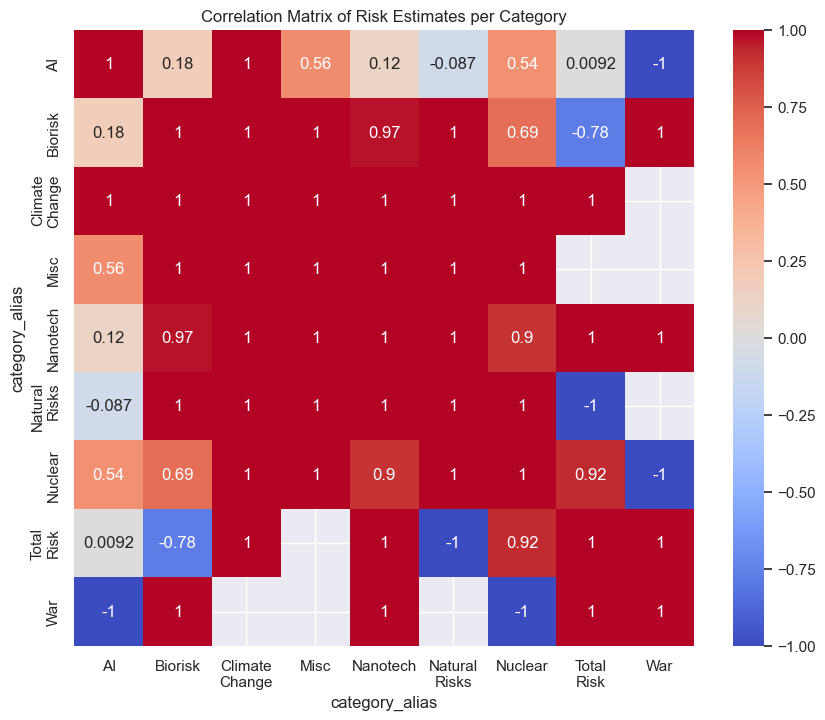

In [121]:
# Leave out dystopia since it only has one estimate.
df_without_dystopia = df[df['risk_category'] != 'dystopia']
# Compute the correlation matrix
correlation_matrix = df_without_dystopia.pivot_table(index='date', columns='category_alias', values='per_century_risk').corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
ax.set_title('Correlation Matrix of Risk Estimates per Category')
plt.show()

## Observations - Category Correlation

Key observations about the correlation matrix:

1. Strong Positive Correlations:
- Climate Change shows perfect correlation (1.0) with most categories
- Nanotech, Natural Risks, and Misc risks are highly correlated (0.97-1.0)
- Nuclear risks correlate strongly with Total Risk (0.92)

2. Notable Negative Correlations:
- AI risk is perfectly negatively correlated with War (-1.0)
- Natural Risks and Total Risk show strong negative correlation (-0.78)
- Several categories show -1.0 correlation with War

3. AI Risk Patterns:
- Shows weak correlation with Biorisk (0.18)
- Moderate correlation with Nuclear (0.54)
- Near-zero correlation with Total Risk (0.0092)

4. Limitations to Consider:
- Small sample size affects reliability
- Temporal clustering of estimates (mostly recent) may create artificial correlations
- Perfect correlations (1.0, -1.0) likely due to limited overlapping data points
- Some correlations may reflect similar methodologies or shared expert influences rather than true risk relationships

These correlations should be interpreted cautiously given the data limitations. The strong correlations might indicate either genuine risk relationships or methodological artifacts.


## Historical Context

Looking at the key time periods in the data, we can connect several significant historical events that likely influenced existential risk estimates:

*Early 2000s peak*: This period saw the aftermath of Y2K concerns, the 9/11 terrorist attacks, and growing awareness of climate change. The publication of influential works like Martin Rees' "Our Final Century" (2003), and "Our Final Hour" (2004) brought existential risks into broader academic discussion. These events highlighted humanity's vulnerability to both technological and human-made catastrophes.

*2015 surge*: This coincided with several watershed moments in technology and global risk awareness. The open letter warning about AI risks was published, signed by prominent figures like Stephen Hawking and Elon Musk. The Paris Climate Agreement highlighted growing concern about climate change.

*2020 peak*: The COVID-19 pandemic demonstrated how a global catastrophe could rapidly emerge and affect the entire world. This real-world example of a systemic risk likely prompted increased attention to existential risk assessment. This period also saw rapid advances in AI technology, particularly with GPT-3's release, which sparked new discussions about AI safety. The publication of Toby Ord's "The Precipice" provided a comprehensive framework for thinking about existential risks, likely inspiring many new estimates.

These historical contexts help explain why we see increased activity in risk assessment during these periods - each represented moments when global threats became more tangible to researchers and the public alike. 

# Confidence Analysis

Claude AI converted the estimates from the original data set. We'll now take a look at these confidence values.

Claude provided two confidence values of low, middle or high, reflecting
1. The confidence in the estimate itself, using remarks from the dataset and basing it on the expertise level of the estimator
2. The confidence in the conversion. Since the estimates were converted mostly from natural language or ranges given by the estimators, the confidence in the conversion reflects the level of uncertainty when taking a more nuanced input into a number.

Text(0.5, 0, 'Risk category')

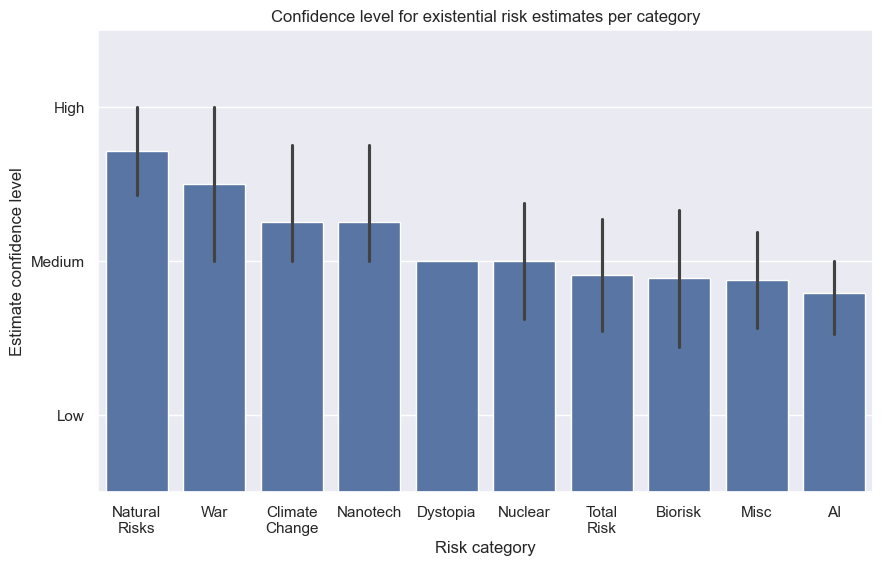

In [122]:
# Visualize the confidence level for each category.
# Plot the confidence level for each category sorted by confidence level.
categories_sorted_by_confidence = df.groupby('category_alias')['estimate_confidence_numeric'].mean().sort_values(ascending=False).index

# Set plot size to 10 by 6 inches
sns.set_theme(rc={'figure.figsize': (10, 6)})

# Create plot with seaborn
ax = sns.barplot(x='category_alias', y='estimate_confidence_numeric', data=df, order=categories_sorted_by_confidence)

# Set plot title, labels and ticks
ax.set_ylim(0.5, 3.5)
ax.set_yticks([1, 2, 3], ['Low', 'Medium', 'High'])
ax.set_title('Confidence level for existential risk estimates per category')
ax.set_ylabel('Estimate confidence level')
ax.set_xlabel('Risk category')

### Observations - TLDR 

- Natural risks have the highest estimate confidence, likely due to better scientific understanding and historical data
- AI and miscellaneous risks show the lowest confidence, possibly reflecting their emerging and complex nature
- War, climate change, and nanotech risks have moderately high confidence levels
- Nuclear risks show medium confidence, despite being a long-studied threat

Text(0.5, 0, 'Risk category')

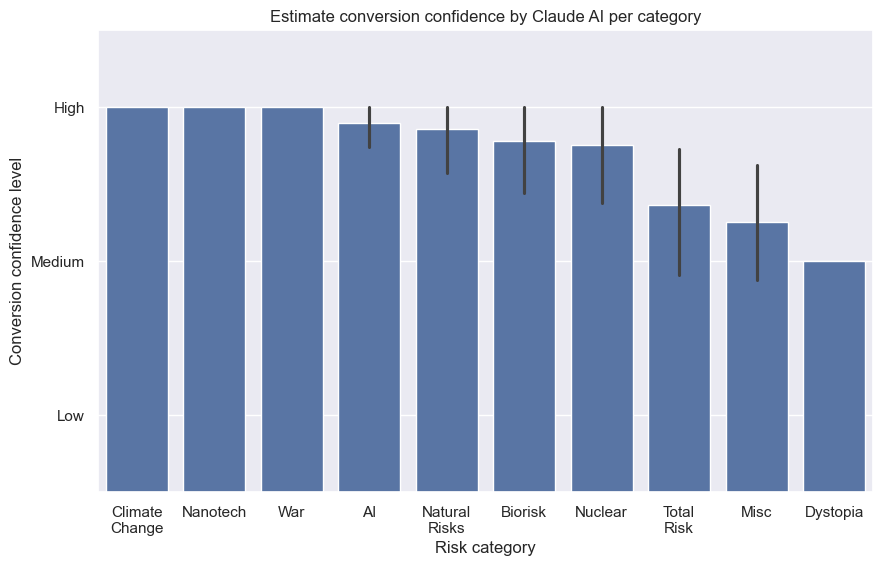

In [123]:
# Visualize the conversion confidence level for each category.

# Sort the categories by conversion confidence level
categories_sorted_by_conversion_confidence = df.groupby('category_alias')['conversion_confidence_numeric'].mean().sort_values(ascending=False).index

# Create plot with seaborn
ax = sns.barplot(x='category_alias', y='conversion_confidence_numeric', data=df, order=categories_sorted_by_conversion_confidence)

# Set plot title, labels and ticks
ax.set_ylim(0.5, 3.5)
ax.set_yticks([1, 2, 3], ['Low', 'Medium', 'High'])
ax.set_title('Estimate conversion confidence by Claude AI per category')
ax.set_ylabel('Conversion confidence level')
ax.set_xlabel('Risk category')

### Observations

The plot reveals several insights about conversion confidence across risk categories:

1. High consistency (no variance) in:
- Climate Change
- Nanotech 
- War
These categories show uniformly high conversion confidence, suggesting estimates typically use clear timeframes and straightforward conversions.

2. Moderate variance in:
- AI
- Natural Risks
- Biorisk
- Nuclear
These show some spread in conversion confidence, indicating a mix of estimate types - some with clear timeframes, others requiring more complex conversions.

3. High variance in:
- Total Risk
- Miscellaneous
These categories show the widest spread in conversion confidence, suggesting inconsistent estimation methods and timeframes.

4. Clear hierarchy:
- Climate Change, Nanotech, and War estimates are most reliably converted
- Miscellaneous and Dystopia estimates are least reliably converted

This pattern suggests that newer, more structured research fields tend to use more standardized timeframes, while broader or more speculative categories often use varied or less precise temporal frameworks.

The lower confidence in Total Risk conversion is particularly notable since it affects overall existential risk assessments. This suggests meta-analyses should carefully weight estimates based on conversion confidence.

**Question**: Could it be that the conversion confidence and the estimate confidence are correlated? 

**Hypothesis**: The less confidence an expert has in their estimate, the vaguer the language they'll use to express their estimate. This results in higher uncertainty when trying to turn their estimates into a numeric value.

However, I think this sort of analysis is out of the scope of this investigation. Since in the end, we're more interested in the overall risk estimates, rather on their metadata (like how estimate confidence and conversion confidence correlate). I'll just leave this hypothesis here as an interesting insight from looking at the data.

# Averaging

We now proceed to compute individual values for each category that "summarizes" the experts' opinions. This should naturally be taken with a big pinch of salt, given that the estimates vary a lot. We'll compute basic statistics, like mean and median, and so on, but also use the confidence levels to come up with weighted averages, that take into consideration the confidence level for each interval.

## Confidence Weights

We will introduce a metric that combines the estimate and the conversion confidence.

We can compute an arithmetic weight, by taking the sum of the two values and dividing by the maximum possible value. **This assumes that both metrics are equally relevant**. I think that assigning different weights to the conversion and estimate confidence values would be somewhat arbitrary, so I'll take them both as equally relevant.

Because the weights are given a value of 1,2 and 3 corresponding to low, medium and high, the maximum possible value for a single estimate would be 6. So we sum the two weights and divide by 6 to obtain a confidence weight.

In [124]:
# Let's first create a compound value - a weight - for the confidence levels.
df['confidence_weight'] = (df['estimate_confidence_numeric'] + df['conversion_confidence_numeric'])/6

We can now compute basic statistics, including a mean, and a weighted mean, which we do in the next cell.

In [125]:
def compute_basic_stats(group):
    """
    Compute basic statistics for a given DataFrame group.

    Parameters:
    group (pd.DataFrame): A DataFrame containing the columns 'per_century_risk', 
                          'confidence_weight', and 'category_alias'.

    Returns:
    pd.Series: A Series containing the following statistics:
        - category_alias (str): The category alias of the group.
        - mean (float): The mean of 'per_century_risk'.
        - weighted_mean (float): The weighted mean of 'per_century_risk' using 'confidence_weight' as weights.
        - confidence_weight_mean (float): The mean of 'confidence_weight'.
        - median (float): The median of 'per_century_risk'.
        - std (float): The standard deviation of 'per_century_risk'.
        - count (int): The number of entries in the group.
        - q1 (float): The 25th percentile (first quartile) of 'per_century_risk'.
        - q3 (float): The 75th percentile (third quartile) of 'per_century_risk'.
        - iqr (float): The interquartile range (IQR) of 'per_century_risk' (q3 - q1).
    """

    # Compute basic stats
    mean = group['per_century_risk'].mean()
    weighted_mean = np.average(group['per_century_risk'], weights=group['confidence_weight'])
    median = group['per_century_risk'].median()
    std = group['per_century_risk'].std()
    count = group.shape[0]
    q1, q3 = group['per_century_risk'].quantile([0.25, 0.75])

    return pd.Series({
        'category_alias': group['category_alias'].values[0],
        'mean': mean,
        'weighted_mean': weighted_mean,
        'confidence_weight_mean': group['confidence_weight'].mean(),
        'median': median,
        'std': std,
        'count': count,
        'q1': q1,
        'q3': q3,
        'iqr': q3 - q1,
    })

df_summary = df.groupby('risk_category')[[
        'risk_category', 
        'per_century_risk', 
        'estimate_confidence_numeric',
        'conversion_confidence_numeric', 
        'confidence_weight', 
        'category_alias'
    ]].apply(compute_basic_stats)
    
df_summary

,category_alias,mean,weighted_mean,confidence_weight_mean,median,std,count,q1,q3,iqr
risk_category,,,,,,,,,,
ai,AI,0.161579,0.160972,0.780702,0.100000,0.154940,19,5.000000e-02,0.250000,0.200000
biorisk,Biorisk,0.008032,0.008567,0.777778,0.000500,0.010398,9,2.000000e-06,0.019000,0.018998
climate_change,Climate\nChange,0.004233,0.004070,0.875000,0.003165,0.004815,4,6.475000e-04,0.006750,0.006103
dystopia,Dystopia,0.005000,0.005000,0.666667,0.005000,NaN,1,5.000000e-03,0.005000,0.000000
miscellaneous,Misc,0.124088,0.123296,0.687500,0.020850,0.170602,16,9.575000e-04,0.200000,0.199043
nanotechnology,Nanotech,0.017950,0.017890,0.875000,0.010850,0.022473,4,3.775000e-03,0.025025,0.021250
natural_risks,Natural\nRisks,0.000979,0.000881,0.928571,0.000001,0.002549,7,5.650000e-07,0.000046,0.000045
nuclear,Nuclear,0.040522,0.034519,0.791667,0.006500,0.086250,8,6.975000e-04,0.020000,0.019303
total,Total\nRisk,0.154907,0.155808,0.712121,0.142000,0.152058,11,3.750000e-02,0.220000,0.182500


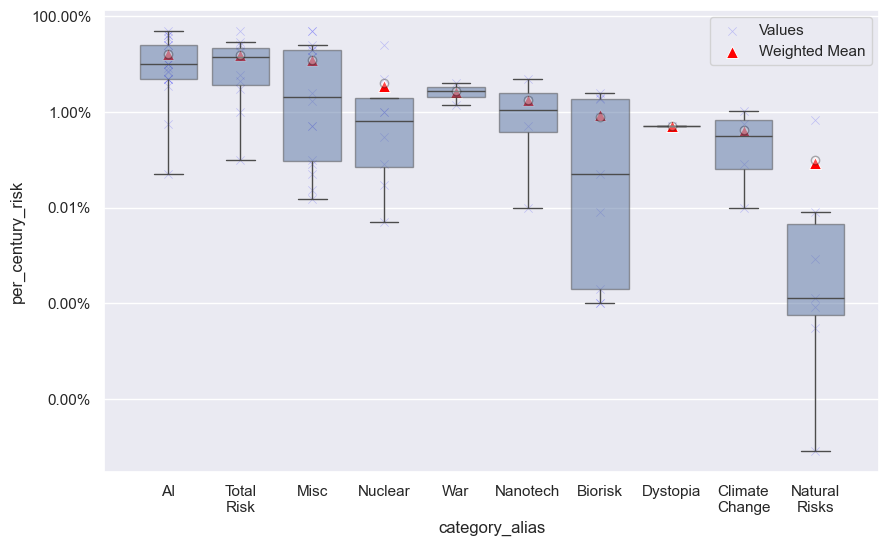

In [126]:

# Sort the categories by mean
categories_sorted_by_mean = df_summary.sort_values(by='mean', ascending=False)['category_alias']

# Visualize the results of the mean and weighted means on top of a box plot to see how they differ from the standard ones
ax = sns.boxplot(
  x='category_alias', y='per_century_risk', 
  data=df, showmeans=True, 
  meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "alpha":0.3}, 
  boxprops=dict(alpha=0.5), 
  order=categories_sorted_by_mean,
  showfliers=False)

ax = sns.scatterplot(x='category_alias', y='per_century_risk', data=df, label='Values', marker='x', color='blue', alpha=0.2)

ax = sns.scatterplot(x='category_alias', y='weighted_mean', data=df_summary, label='Weighted Mean', marker='^', color='red', s=75)
ax.set_yscale('log')

# Format the y-axis as percentage
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))

plt.show()


As we can see the weighted means do not change too much from the normal mean.

It is also notable that the weighted mean (and the mean) is often relatively far from the median, and in a few cases even outside the IQR. This might be due to the fact that the mean is strongly affected by outliers. And as we saw in the [Outliers](#outliers) section, there are a few of them, which we decided to leave.

Because we're dealing with data that is relatively widely spread, we'll also compute a geometric mean, which should be less affected by outliers or widely spread data, as is our case.

A geometric mean can be computed as follows:

$$
\begin{align}
\bar x_g = \left(\prod_{i=1}^n x_i\right)^\frac{1}{n}=\sqrt[n]{x_1\cdot x_2 \cdots x_n}
\end{align}
$$

For better numerical stability instead of a product, we can use the summation of the logarithm of $x_i$ (risk estimate). This is the equivalent formula for $\bar x_g$ using the summation of logarithms and exponentials:

$$
\bar x_g = \exp(\frac{1}{n}\sum_{i=1}^n \log(x_i))
$$

In [127]:
def compute_geometric_mean(group):
    """
    Compute the geometric mean of the 'per_century_risk' column in a given DataFrame group.

    Parameters:
    group (pd.DataFrame): A pandas DataFrame group containing a 'per_century_risk' column.

    Returns:
    pd.Series: A pandas Series with a single value 'geometric_mean' representing the geometric mean of the 'per_century_risk' values in the group.
    """

    return pd.Series({
        'geometric_mean': np.exp(np.sum(np.log(group['per_century_risk']))/len(group))
    })

df_geometric_mean = df.groupby('risk_category')[['risk_category', 'per_century_risk']].apply(compute_geometric_mean)
df_geometric_mean

df_summary['geometric_mean'] = df_geometric_mean['geometric_mean']

df_summary[['mean', 'weighted_mean', 'geometric_mean']]

,mean,weighted_mean,geometric_mean
risk_category,,,
ai,0.161579,0.160972,0.080536
biorisk,0.008032,0.008567,0.000263
climate_change,0.004233,0.004070,0.001480
dystopia,0.005000,0.005000,0.005000
miscellaneous,0.124088,0.123296,0.015109
nanotechnology,0.017950,0.017890,0.004520
natural_risks,0.000979,0.000881,0.000003
nuclear,0.040522,0.034519,0.003834
total,0.154907,0.155808,0.067965


We notice that the geometric mean is significantly lower for most risk categories, except for dystopia, which only has one estimate. Let's see how it looks like when plotted against the arithmetic mean.

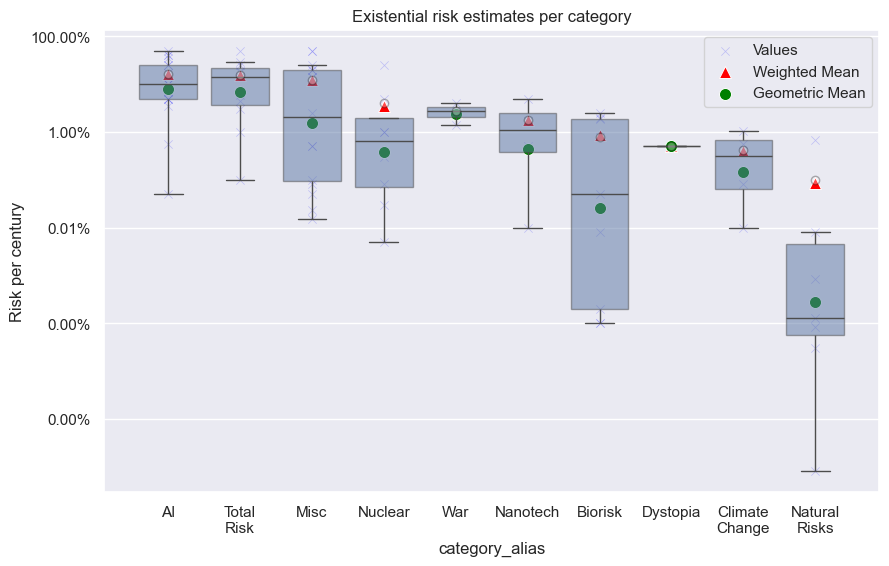

In [128]:
# Sort the categories by mean
categories_sorted_by_mean = df_summary.sort_values(by='mean', ascending=False)['category_alias']

# Visualize the results of the mean and weighted means on top of a box plot to see how they differ from the standard ones
ax = sns.boxplot(
  x='category_alias', y='per_century_risk', 
  data=df, showmeans=True, 
  meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "alpha":0.3}, 
  boxprops=dict(alpha=0.5), 
  order=categories_sorted_by_mean,
  showfliers=False)

ax = sns.scatterplot(x='category_alias', y='per_century_risk', data=df, label='Values', marker='x', color='blue', alpha=0.2)

ax = sns.scatterplot(x='category_alias', y='weighted_mean', data=df_summary, label='Weighted Mean', marker='^', color='red', s=75)
ax.set_yscale('log')

sns.scatterplot(x='category_alias', y='geometric_mean', data=df_summary, label='Geometric Mean', marker='o', color='green', s=75)

# Format the y-axis as percentage
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
ax.set_title('Existential risk estimates per category')
ax.set_ylabel('Risk per century')
plt.show()

We can see that the geometric mean looks somewhat closer to the median and more often than not inside the IQR. This is probably due to the fact that the geometric mean is less sensitive to extreme values than the arithmetic mean. It might be a good idea to use the geometric mean instead of the arithmetic mean.

Now, as a final step in this section, let's use the confidence weights to compute a weighted geometric mean. 

According to our previous analysis, there's a slight inverse correlation between the estimates' magnitude and the confidence level, meaning that the highest the confidence, the lower the estimate's magnitude - though not always. Maybe this will cause the weighted geometric means to be slightly lower than the unweighted ones for the values where the confidence is highest.

In [129]:
def weighted_geometric_mean(group):
    """
    Calculate the weighted geometric mean of the 'per_century_risk' column in a DataFrame group.

    Parameters:
    group (pd.DataFrame): A pandas DataFrame containing at least the columns 'per_century_risk' and 'confidence_weight'.

    Returns:
    pd.Series: A pandas Series with a single value 'weighted_geometric_mean' representing the weighted geometric mean of the 'per_century_risk' values.
    """
    
    weighted_geo_mean = np.exp(np.average(np.log(group['per_century_risk']), weights=group['confidence_weight']))
    return pd.Series({
        'weighted_geometric_mean': weighted_geo_mean
    })

df_summary['weighted_geometric_mean'] = df.groupby('risk_category')[['per_century_risk', 'confidence_weight']].apply(weighted_geometric_mean)['weighted_geometric_mean']
df_summary
df_summary[['mean', 'weighted_mean', 'geometric_mean', 'weighted_geometric_mean']]

,mean,weighted_mean,geometric_mean,weighted_geometric_mean
risk_category,,,,
ai,0.161579,0.160972,0.080536,0.084158
biorisk,0.008032,0.008567,0.000263,0.000348
climate_change,0.004233,0.004070,0.001480,0.001439
dystopia,0.005000,0.005000,0.005000,0.005000
miscellaneous,0.124088,0.123296,0.015109,0.018336
nanotechnology,0.017950,0.017890,0.004520,0.004811
natural_risks,0.000979,0.000881,0.000003,0.000002
nuclear,0.040522,0.034519,0.003834,0.003007
total,0.154907,0.155808,0.067965,0.076293


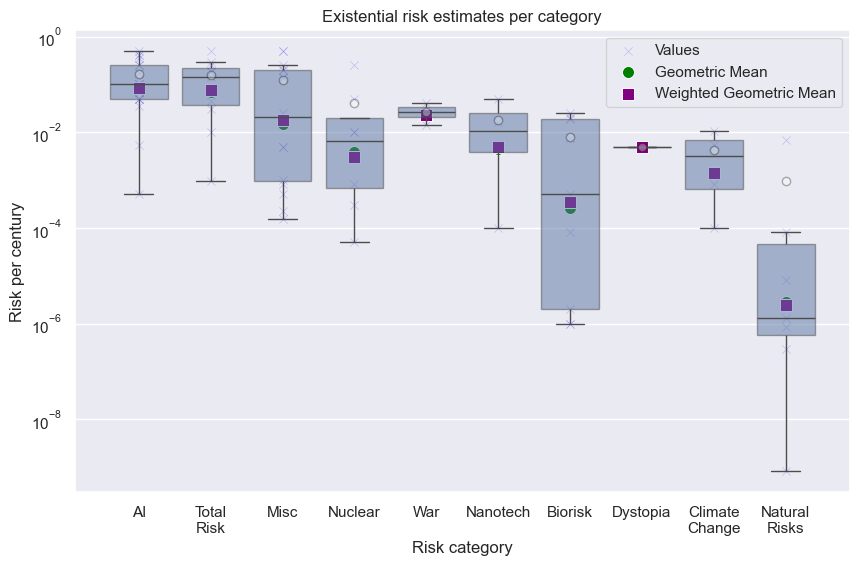

In [130]:
# Sort the categories by mean
categories_sorted_by_mean = df_summary.sort_values(by='mean', ascending=False)['category_alias']

# Visualize the results of the mean and weighted means on top of a box plot to see how they differ from the standard ones
ax = sns.boxplot(
  x='category_alias', y='per_century_risk', 
  data=df, showmeans=True, 
  meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "alpha":0.3}, 
  boxprops=dict(alpha=0.5), 
  order=categories_sorted_by_mean,
  showfliers=False)

ax = sns.scatterplot(x='category_alias', y='per_century_risk', data=df, label='Values', marker='x', color='blue', alpha=0.2)

sns.scatterplot(x='category_alias', y='geometric_mean', data=df_summary, label='Geometric Mean', marker='o', color='green', s=75)

sns.scatterplot(x='category_alias', y='weighted_geometric_mean', data=df_summary, label='Weighted Geometric Mean', marker='s', color='purple', s=75)

# Format the y-axis as percentage
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
ax.set_title('Existential risk estimates per category')
ax.set_ylabel('Risk per century')
ax.set_yscale('log')

ax.set_xlabel('Risk category')
ax.set_ylabel('Risk per century')

plt.show()

It seems that actually the difference between the geometric mean and weighted geometric mean is also very slight. It is indeed slightly lower for Natural Risks, but remains almost the same for climate change.

In [131]:
# Save the values to a csv file
df_summary.to_csv('./data/processed_estimates/summary_estimates.csv', index=False)
df.to_csv('./data/processed_estimates/all_estimates_cleaned.csv', index=False)

# Conclusions

We analyzed what experts think about humanity's biggest risks by looking at 81 different estimates across various types of threats. Here's what we discovered about the potential risks to humanity's future.

## Key Findings About Risk Levels

### Highest Risk Categories
Artificial intelligence and overall catastrophic risks emerged as our biggest concerns, with experts estimating around a 15-20% chance of something going seriously wrong this century.

### Medium Risk Categories
Most risks like nuclear war, nanotechnology gone wrong, and biological threats fell in the middle range. Experts suggested roughly a 1-5% chance of catastrophe per century from these threats.

### Lowest Risk Category
Natural disasters showed the lowest risk - less than 1% chance per century. Interestingly, experts were most confident about these estimates because we have good historical data about events like asteroids and volcanoes.

## Temporal Patterns and Trends

We noticed some interesting patterns in when these estimates were made:
- A significant increase in the number of expert predictions after 2015
- A particular surge around 2020
- These spikes might reflect growing concerns about AI and other technological risks
- The COVID-19 pandemic likely served as a wake-up call, prompting more risk assessment

## The Confidence Paradox

We discovered an intriguing pattern: when experts were more confident about their predictions, they usually gave lower risk estimates. Conversely, when they were less sure, they tended to predict higher risks. This makes sense - the threats we understand better (like natural disasters) seem less dangerous than the ones we're still trying to figure out (like advanced AI).

## Methodology and Limitations

### Dataset Constraints
- Our analysis used only 81 estimates spread across 9-10 categories
- This small sample size limits the statistical strength of our conclusions
- Experts used different timeframes and methods of expressing risk
- We had to convert everything to a per-century format, adding some uncertainty

### Analysis Techniques
We employed several mathematical approaches to handle the data effectively:
- Used geometric means instead of regular averages to better handle extreme values
- Created a confidence scoring system to give more weight to reliable estimates
- Converted different time scales to a common century-based format

### Potential Further Analysis
While we could have conducted additional analyses (like examining expert backgrounds or trying different weighting methods), we reached a point of diminishing returns. Given our small dataset and the inherent uncertainty in predicting existential risks, further analysis would likely not yield significantly more insights.

## Conclusions and Next Steps

### Main Takeaways
- AI and overall catastrophic risks are the experts' primary concerns
- Medium-level concern exists for nuclear war and bioweapons
- Natural disasters rank as the least worrying threats
- However, these are educated guesses about extremely complex and uncertain events

### Moving Forward
Our next step is to use these estimates to model potential survival scenarios for humanity. While our analysis isn't perfect, it provides a solid foundation based on the best available expert knowledge.

### A Note of Caution
Remember that these estimates represent expert opinions about highly uncertain events. They serve as a starting point for understanding potential risks to humanity's future, not as definitive predictions. The variation in expert opinions and confidence levels reminds us to maintain a balanced perspective when considering these existential risks.